In [1]:
! h5dump -n small.hdf5

HDF5 "small.hdf5" {
FILE_CONTENTS {
 group      /
 group      /Grid
 dataset    /Grid/Bathymetry
 dataset    /Grid/ConnectionX
 dataset    /Grid/ConnectionY
 dataset    /Grid/Define Cells
 dataset    /Grid/LandUse
 dataset    /Grid/Latitude
 dataset    /Grid/Longitude
 group      /Grid/VerticalZ
 dataset    /Grid/VerticalZ/Vertical_00001
 dataset    /Grid/VerticalZ/Vertical_00002
 dataset    /Grid/VerticalZ/Vertical_00003
 dataset    /Grid/VerticalZ/Vertical_00004
 dataset    /Grid/WaterPoints2D
 dataset    /Grid/WaterPoints3D
 group      /Results
 group      /Results/air temperature
 dataset    /Results/air temperature/air temperature_00001
 dataset    /Results/air temperature/air temperature_00002
 dataset    /Results/air temperature/air temperature_00003
 dataset    /Results/air temperature/air temperature_00004
 group      /Results/atmospheric pressure
 dataset    /Results/atmospheric pressure/atmospheric pressure_00001
 dataset    /Results/atmospheric pressure/atmospheric pressure

In [2]:
import h5py
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

In [3]:
f = h5py.File('small.hdf5', 'r')

In [4]:
[x for x in f.keys()]

['Grid', 'Results', 'Time']

In [5]:
[x for x in f['Grid'].keys()]

['Bathymetry',
 'ConnectionX',
 'ConnectionY',
 'Define Cells',
 'LandUse',
 'Latitude',
 'Longitude',
 'VerticalZ',
 'WaterPoints2D',
 'WaterPoints3D']

In [6]:
[x for x in f['Results'].keys()]

['air temperature',
 'atmospheric pressure',
 'mslp_WRF',
 'precipitation',
 'relative humidity',
 'wind stress X',
 'wind stress Y',
 'wind velocity X',
 'wind velocity Y']

In [7]:
[x for x in f['Results']['air temperature'].keys()]

['air temperature_00001',
 'air temperature_00002',
 'air temperature_00003',
 'air temperature_00004']

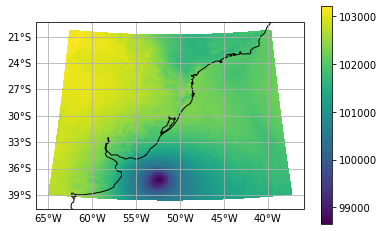

In [14]:
fig, ax = plt.subplots(1,1, subplot_kw={'projection': ccrs.PlateCarree()})

vname = 'mslp_WRF'
p1 = ax.pcolormesh(f['Grid']['Longitude'], f['Grid']['Latitude'], f['Results'][vname][vname + '_00001'], transform=ccrs.PlateCarree())
plt.colorbar(p1)
ax.coastlines()
gl = ax.gridlines(draw_labels=True)
gl.top_labels = False
gl.right_labels = False

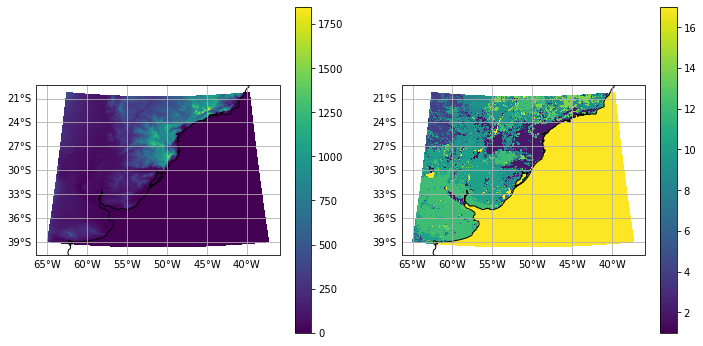

In [13]:
fig, axs = plt.subplots(1,2, figsize=(12,6), subplot_kw={'projection': ccrs.PlateCarree()})

ax = axs[0]
p1 = ax.pcolormesh(f['Grid']['Longitude'], f['Grid']['Latitude'], f['Grid']['Bathymetry'], transform=ccrs.PlateCarree())
plt.colorbar(p1, ax=ax)

ax = axs[1]
p1 = ax.pcolormesh(f['Grid']['Longitude'], f['Grid']['Latitude'], f['Grid']['LandUse'], transform=ccrs.PlateCarree())
plt.colorbar(p1, ax=ax)


for ax in axs:
    ax.coastlines()
    gl = ax.gridlines(draw_labels=True)
    gl.top_labels = False
    gl.right_labels = False